<a href="https://colab.research.google.com/github/Visionaryofthefuture/CRM-Data-Analysis/blob/master/CRM_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
import seaborn as sns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [ ]:
import os

df_list = []

for i in os.listdir("/content/"):
    if i in ["accounts.csv", "sales_pipeline.csv", "data_dictionary.csv", "products.csv", "sales_teams.csv"]:
        df = pd.read_csv("/content/" + i)
        df_list.append((i, df))

df_list_sorted = sorted(df_list, key=lambda x: x[0])

account = df_list_sorted[0][1]
data_dictionary = df_list_sorted[1][1]
products = df_list_sorted[2][1]
sales_pipeline = df_list_sorted[3][1]
sales_teams= df_list_sorted[4][1]

account.loc[account['sector'] == 'technolgy', 'sector'] = 'technology'
account['subsidiary_of'].fillna("Independent", inplace=True)


In [ ]:
account

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technology,1996,1100.04,2822,United States,Independent
1,Betasoloin,medical,1999,251.41,495,United States,Independent
2,Betatech,medical,1986,647.18,1185,Kenya,Independent
3,Bioholding,medical,2012,587.34,1356,Philipines,Independent
4,Bioplex,medical,1991,326.82,1016,United States,Independent
5,Blackzim,retail,2009,497.11,1588,United States,Independent
6,Bluth Company,technology,1993,1242.32,3027,United States,Acme Corporation
7,Bubba Gump,software,2002,987.39,2253,United States,Independent
8,Cancity,retail,2001,718.62,2448,United States,Independent
9,Cheers,entertainment,1993,4269.90,6472,United States,Massive Dynamic


In [ ]:
products

,product,series,sales_price
0,GTX Basic,GTX,550
1,GTX Pro,GTX,4821
2,MG Special,MG,55
3,MG Advanced,MG,3393
4,GTX Plus Pro,GTX,5482
5,GTX Plus Basic,GTX,1096
6,GTK 500,GTK,26768



Total Orders placed per company

In [ ]:
won = sales_pipeline[sales_pipeline['deal_stage'] == "Won"]
result = won.groupby('account')['deal_stage'].count().reset_index()
result = result.sort_values(ascending = False, by = "deal_stage")
result.head(1)

,account,deal_stage
40,Kan-code,115


<Axes: xlabel='account'>

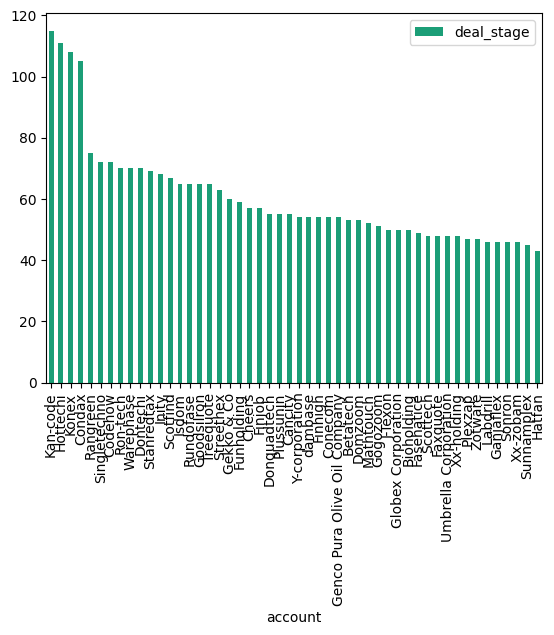

In [ ]:
 #@title Visualising top Company order
to_plot = result[0:50]
to_plot.set_index('account', inplace=True)
to_plot.plot(kind = "bar", color = sns.palettes.mpl_palette('Dark2'))

In [ ]:
# Net revenue Generated -
won["close_value"].sum()

10005534.0

In [ ]:
result = pd.merge(top2_byamount, top2_byquantity, on="product")
result

,product,close_value,Quantity
0,GTXPro,3510578.0,729
1,GTX Plus Pro,2629651.0,479
2,MG Advanced,2216387.0,654
3,GTX Plus Basic,705275.0,653
4,GTX Basic,499263.0,915
5,GTK 500,400612.0,15
6,MG Special,43768.0,793


In [ ]:
sales_pipeline.drop(columns = ["opportunity_id"], inplace =True)
sales_pipeline.head(10)

,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
5,Anna Snelling,MG Special,Ron-tech,Won,2016-10-29,2017-03-01,49.0
6,Vicki Laflamme,MG Special,J-Texon,Won,2016-10-30,2017-03-02,57.0
7,Markita Hansen,GTX Basic,Cheers,Won,2016-11-01,2017-03-07,601.0
8,Niesha Huffines,GTX Plus Basic,Zumgoity,Won,2016-11-01,2017-03-03,1026.0
9,James Ascencio,MG Advanced,NaN,Engaging,2016-11-03,NaN,NaN


Top 2 products sold per year by amount


In [ ]:
won_deals = sales_pipeline[sales_pipeline['deal_stage'] == "Won"]
top2_byamount = won_deals.groupby("product")["close_value"].sum().sort_values(ascending=False)
top2_byamount = top2_byamount.reset_index()
top2_byamount  = top2_byamount
top2_byamount

,product,close_value
0,GTXPro,3510578.0
1,GTX Plus Pro,2629651.0
2,MG Advanced,2216387.0
3,GTX Plus Basic,705275.0
4,GTX Basic,499263.0
5,GTK 500,400612.0
6,MG Special,43768.0


To find the top 2 sold by quantity

In [ ]:
won_deals = sales_pipeline[sales_pipeline['deal_stage'] == "Won"]
top2_byquantity = won_deals.groupby("product").size().sort_values(ascending=False)
top2_byquantity = top2_byquantity.reset_index(name='Quantity')
top2_byquantity

,product,Quantity
0,GTX Basic,915
1,MG Special,793
2,GTXPro,729
3,MG Advanced,654
4,GTX Plus Basic,653
5,GTX Plus Pro,479
6,GTK 500,15


To recommend the best sales agent by bias


In [ ]:
columns = ['sales_agent', 'Number of products sold']
won = sales_pipeline[sales_pipeline['deal_stage'] == 'Won']
sales_agent_by_revenue = won.groupby('sales_agent')['close_value'].sum().reset_index().sort_values(ascending = False, by = "close_value")
sales_agent_by_number = won.groupby('sales_agent')['close_value'].count().reset_index()
sales_agent_by_number.columns = columns
sales_agent_by_number = sales_agent_by_number.sort_values(ascending = False, by = "Number of products sold")


Sales Agent performance by revenue earned



30


<Axes: xlabel='sales_agent'>

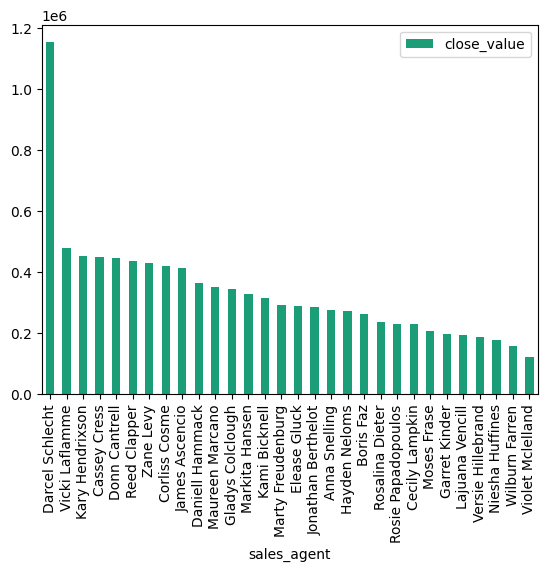

In [ ]:
print(sales_pipeline["sales_agent"].nunique())

sales_agent = sales_pipeline.groupby('sales_agent')['close_value'].sum().reset_index()
sales_agent = sales_agent.sort_values(by = "close_value", ascending = False)
sales_agent.set_index('sales_agent', inplace = True)
sales_agent.plot(kind = "bar", color = sns.palettes.mpl_palette('Dark2'))

Index(['Number of products sold'], dtype='object')


<Axes: xlabel='sales_agent'>

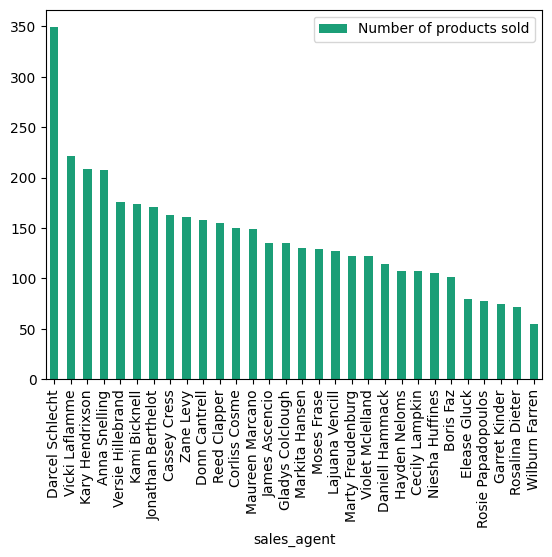

In [ ]:
sales_agent_by_number.set_index('sales_agent', inplace = True)
print(sales_agent_by_number.columns)
sales_agent_by_number.plot(kind= "bar", color = sns.palettes.mpl_palette('Dark2'))

In [ ]:
sales_agent_by_number

,Number of products sold
sales_agent,
Darcel Schlecht,349
Vicki Laflamme,221
Kary Hendrixson,209
Anna Snelling,208
Versie Hillebrand,176
Kami Bicknell,174
Jonathan Berthelot,171
Cassey Cress,163
Zane Levy,161


In [ ]:
won_deals = sales_pipeline[sales_pipeline['deal_stage'] == 'Won']
product_counts = pd.pivot_table(won_deals, index='sales_agent', columns='product', values='close_value', aggfunc='count', fill_value=0)

In [ ]:
sales_agent_merged = pd.merge(sales_agent_by_revenue, sales_agent_by_number, how = "outer", on = "sales_agent")
sales_agent_merged["average_cost_sold"] = sales_agent_merged["close_value"]/sales_agent_merged["Number of products sold"]
sales_agent_merged = sales_agent_merged.sort_values(ascending = False, by = "close_value")
sales_agent_merged.reset_index()
sales_agent_merged2 = pd.merge(sales_agent_merged, product_counts, how = "outer", on = "sales_agent")
sales_agent_merged2.sort_values(by = "")

,sales_agent,close_value,Number of products sold,average_cost_sold,GTK 500,GTX Basic,GTX Plus Basic,GTX Plus Pro,GTXPro,MG Advanced,MG Special
0,Darcel Schlecht,1153214.0,349,3304.338109,0,36,56,33,160,36,28
1,Vicki Laflamme,478396.0,221,2164.687783,0,56,13,16,40,45,51
2,Kary Hendrixson,454298.0,209,2173.674641,0,82,30,20,50,8,19
3,Cassey Cress,450489.0,163,2763.736196,0,35,26,18,38,36,10
4,Donn Cantrell,445860.0,158,2821.898734,0,45,21,17,40,32,3
5,Reed Clapper,438336.0,155,2827.974194,0,24,28,18,42,28,15
6,Zane Levy,430068.0,161,2671.229814,0,48,26,21,46,10,10
7,Corliss Cosme,421036.0,150,2806.906667,0,36,27,30,37,9,11
8,James Ascencio,413533.0,135,3063.207407,0,34,14,44,20,12,11
9,Daniell Hammack,364229.0,114,3194.991228,0,11,31,18,40,8,6


Now to analyze remaining parameters like lost
:

In [ ]:
lost_deals = sales_pipeline[sales_pipeline['deal_stage'].isin(["Lost"])]
lost_deals_count = lost_deals.groupby("sales_agent").size().sort_values(ascending=False).reset_index(name='Lost Deals')
sales_agent_merged2 = pd.merge(sales_agent_merged2, lost_deals_count, how="outer", on="sales_agent")

sales_agent_merged2["lost_deals_percentage"] = (sales_agent_merged2["Lost Deals"] )/ (sales_agent_merged2["Number of products sold"]+sales_agent_merged2["Lost Deals"]) * 100
sales_agent_merged2.sort_values(ascending=False, by="close_value")
sales_agent_merged2.to_csv("sales_agent_report.csv")

TO check how many unique companies were brought in

In [ ]:
unique_company = []
for i in sales_agent_merged2["sales_agent"]:
  unique_company.append(sales_pipeline[sales_pipeline["sales_agent"] == i]["account"].nunique())
sales_agent_merged2["unique_companies"] = unique_company
sales_agent_merged2

,sales_agent,close_value,Number of products sold,average_cost_sold,GTK 500,GTX Basic,GTX Plus Basic,GTX Plus Pro,GTXPro,MG Advanced,MG Special,Lost Deals,lost_deals_percentage,unique_companies
0,Darcel Schlecht,1153214.0,349,3304.338109,0,36,56,33,160,36,28,204,36.889693,55
1,Vicki Laflamme,478396.0,221,2164.687783,0,56,13,16,40,45,51,126,36.311239,46
2,Kary Hendrixson,454298.0,209,2173.674641,0,82,30,20,50,8,19,126,37.611940,48
3,Cassey Cress,450489.0,163,2763.736196,0,35,26,18,38,36,10,98,37.547893,45
4,Donn Cantrell,445860.0,158,2821.898734,0,45,21,17,40,32,3,117,42.545455,30
5,Reed Clapper,438336.0,155,2827.974194,0,24,28,18,42,28,15,82,34.599156,29
6,Zane Levy,430068.0,161,2671.229814,0,48,26,21,46,10,10,100,38.314176,48
7,Corliss Cosme,421036.0,150,2806.906667,0,36,27,30,37,9,11,79,34.497817,48
8,James Ascencio,413533.0,135,3063.207407,0,34,14,44,20,12,11,71,34.466019,42
9,Daniell Hammack,364229.0,114,3194.991228,0,11,31,18,40,8,6,73,39.037433,44


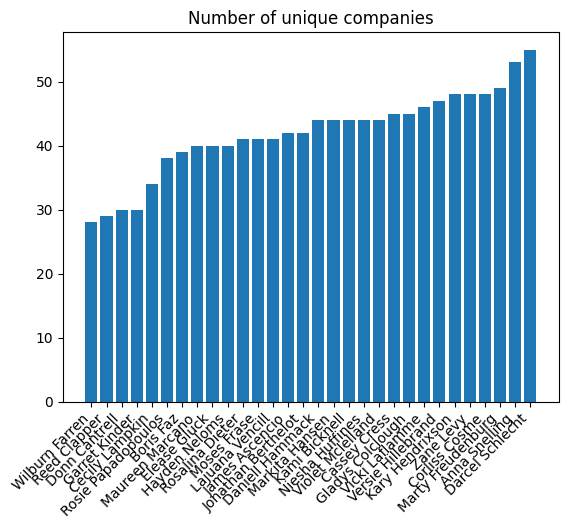

In [ ]:
x = sales_agent_merged2["sales_agent"].tolist()
y = sales_agent_merged2["unique_companies"].tolist()
plot_dict = {}
for i,j in zip(x,y):
  plot_dict[i]=j
sorted_plot_dict = {k: v for k, v in sorted(plot_dict.items(),key=lambda item: item[1])}
x = list(sorted_plot_dict.keys())
y = list(sorted_plot_dict.values())

plt.bar(x,y)
plt.xticks(rotation = 45, ha = "right")
plt.title("Number of unique companies")
plt.show()

In [ ]:
sales_agent_merged2[sales_agent_merged2["unique_companies"] == sales_agent_merged2["unique_companies"].max()]

,sales_agent,close_value,Number of products sold,average_cost_sold,GTK 500,GTX Basic,GTX Plus Basic,GTX Plus Pro,GTXPro,MG Advanced,MG Special,Lost Deals,lost_deals_percentage,unique_companies
0,Darcel Schlecht,1153214.0,349,3304.338109,0,36,56,33,160,36,28,204,36.889693,55


Considering Darcel Schlecht
1. sold the most units,
2. has the best closing value with a reasonable lost/total deals ratio
3. has sold products on average with cost above 3000$
4. Has the highest number of unique company deals

he is the best candidate for the best sales agent.

------------------------------------------------------------------


To find out company wise to see who bought most of which product

In [ ]:
company_product = pd.merge(account, sales_pipeline, on="account", how="outer")
company_product = company_product[ company_product["deal_stage"].isin(["Won"])]
company_product = company_product.groupby(["account", "product"]).size().reset_index(name = 'count')
company_product = company_product.sort_values(by="count", ascending=False)
for i in account["account"].unique():
  if i in company_product["account"].unique():
    continue
  else:
    company_product = company_product.append({"account": i, "product": "None", "count": 0}, ignore_index=True)
company_product

company_product= company_product.pivot(index="account", columns="product", values="count")
company_product.fillna(0,inplace = True)
company_product = pd.merge(account, company_product, on="account", how="outer")
company_product["Total Orders"] = company_product["GTX Basic"] + company_product["GTX Plus Basic"] + company_product["GTX Plus Pro"] + company_product["GTXPro"] + company_product["GTK 500"] + company_product["MG Advanced"] + company_product["MG Special"]
company_product.sort_values(by = "Total Orders", ascending = False)

,account,sector,year_established,revenue,employees,office_location,subsidiary_of,GTK 500,GTX Basic,GTX Plus Basic,GTX Plus Pro,GTXPro,MG Advanced,MG Special,Total Orders
41,Kan-code,software,1982,11698.03,34288,United States,Independent,1.0,26.0,15.0,17.0,26.0,20.0,10.0,115.0
35,Hottechi,technology,1997,8170.38,16499,Korea,Independent,0.0,37.0,20.0,6.0,15.0,14.0,19.0,111.0
43,Konex,technology,1980,7708.38,13756,United States,Independent,0.0,24.0,19.0,13.0,18.0,22.0,12.0,108.0
11,Condax,medical,2017,4.54,9,United States,Independent,0.0,22.0,16.0,13.0,15.0,9.0,30.0,105.0
56,Rangreen,technology,1987,2938.67,8775,Panama,Independent,0.0,17.0,13.0,5.0,8.0,18.0,14.0,75.0
63,Singletechno,retail,1996,2214.94,5374,United States,Independent,0.0,16.0,16.0,5.0,14.0,13.0,8.0,72.0
10,Codehow,software,1998,2714.90,2641,United States,Acme Corporation,0.0,15.0,15.0,7.0,8.0,11.0,16.0,72.0
58,Ron-tech,medical,1992,3922.42,6837,United States,Independent,0.0,15.0,15.0,3.0,9.0,12.0,16.0,70.0
75,Warephase,services,1997,2041.73,5276,United States,Independent,0.0,11.0,14.0,9.0,12.0,12.0,12.0,70.0
18,Dontechi,software,1982,4618.00,10083,United States,Independent,0.0,17.0,7.0,4.0,10.0,13.0,19.0,70.0


Two subsidiaries bought GTK 500, rest all independent

-------------------------------------------------------------------------------------

**To check region wise which product sold the most and which company bought it the most, that way we can recommend more sales of that product to that company in that region**

In [ ]:
most_sold = pd.merge(sales_pipeline, sales_teams, on = "sales_agent", how = "outer")
most_sold = most_sold[most_sold["deal_stage"].isin(["Won"])]
most_sold.drop(columns = ["close_date", "engage_date", "deal_stage"], inplace = True)
most_sold = most_sold.groupby("product").apply(lambda x:x.sort_values(by = "close_value", ascending = False)).reset_index(drop = True )

most_sold = pd.merge(account, most_sold, on = "account").drop(columns = [i for i in account.columns if i not in["sector","account"]])
most_sold.groupby(["product", "sector"]).apply(lambda x:x.sort_values(by = "close_value", ascending = False)).reset_index(drop = True )
most_sold.head(10)

,account,sector,sales_agent,product,close_value,manager,regional_office
0,Acme Corporation,technology,Donn Cantrell,GTX Basic,586.0,Rocco Neubert,East
1,Acme Corporation,technology,Corliss Cosme,GTX Basic,577.0,Cara Losch,East
2,Acme Corporation,technology,Reed Clapper,GTX Basic,556.0,Rocco Neubert,East
3,Acme Corporation,technology,Donn Cantrell,GTX Basic,549.0,Rocco Neubert,East
4,Acme Corporation,technology,Daniell Hammack,GTX Plus Basic,1282.0,Rocco Neubert,East
5,Acme Corporation,technology,Cassey Cress,GTX Plus Basic,1161.0,Rocco Neubert,East
6,Acme Corporation,technology,Cassey Cress,GTX Plus Basic,1161.0,Rocco Neubert,East
7,Acme Corporation,technology,Cassey Cress,GTX Plus Basic,1096.0,Rocco Neubert,East
8,Acme Corporation,technology,Reed Clapper,GTX Plus Basic,1095.0,Rocco Neubert,East
9,Acme Corporation,technology,Violet Mclelland,GTX Plus Basic,1022.0,Cara Losch,East


6 units of GTK 500 sold above the price
percentage is : 40.0


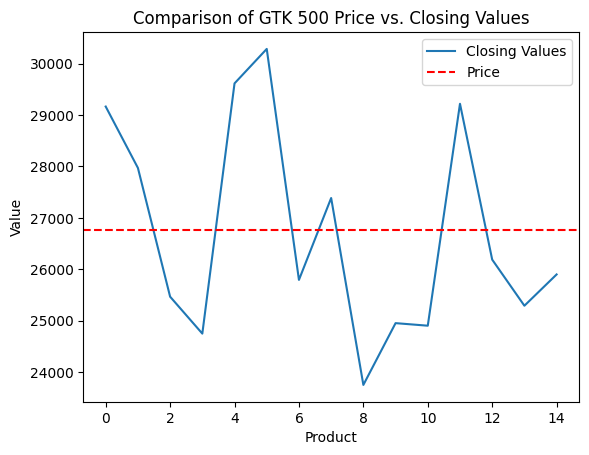

In [ ]:
import matplotlib.pyplot as plt
def market_price_vs_closing_value(product:str):
  gtk_closing_values = most_sold[most_sold['product'] == product]['close_value']
  gtk_price = products[products['product'] == product]['sales_price'].values[0]
  x_values = range(len(gtk_closing_values))
  plt.plot(x_values, gtk_closing_values, label='Closing Values')
  plt.axhline(y=gtk_price, color='r', linestyle='dashed', label='Price')
  # to find how many have closing price > sales price
  count = 0
  for i in gtk_closing_values:
    if i > gtk_price:
      count += 1
  print(f"{count} units of {product} sold above the price")
  print(f"percentage is : {count/len(gtk_closing_values)*100}")

  plt.xlabel('Product')
  plt.ylabel('Value')
  plt.title(f'Comparison of {product} Price vs. Closing Values')

  plt.legend()
  plt.show()
market_price_vs_closing_value("GTK 500")


THe table that iwill be using for product distribution and recommendation


In [ ]:
most_sold.groupby("product")["regional_office"].apply(lambda x : x.value_counts())

product                
GTK 500         West        15
GTX Basic       West       366
                Central    334
                East       215
GTX Plus Basic  Central    255
                West       213
                East       185
GTX Plus Pro    Central    170
                West       160
                East       149
GTXPro          East       266
                West       234
                Central    229
MG Advanced     Central    245
                West       215
                East       194
MG Special      Central    396
                West       235
                East       162
Name: regional_office, dtype: int64

GDK 500


In [ ]:
most_sold.head()
product_table = pd.pivot_table(most_sold, index='product', columns='sector', values='close_value', aggfunc='count', fill_value=0)

In [ ]:
print(product_table.columns)
totals = []
maximum_sector = []
for i in product_table.index:
  maximum_sector.append(product_table.loc[i].idxmax())
sum = 0
for i in product_table.columns[:10]:
  sum  = sum + product_table[i]
product_table["total"] = sum
product_table["maximum_sector"] = maximum_sector


Index(['employment', 'entertainment', 'finance', 'marketing', 'medical',
       'retail', 'services', 'software', 'technology', 'telecommunications'],
      dtype='object', name='sector')


To find the best product that can be sold in next few years


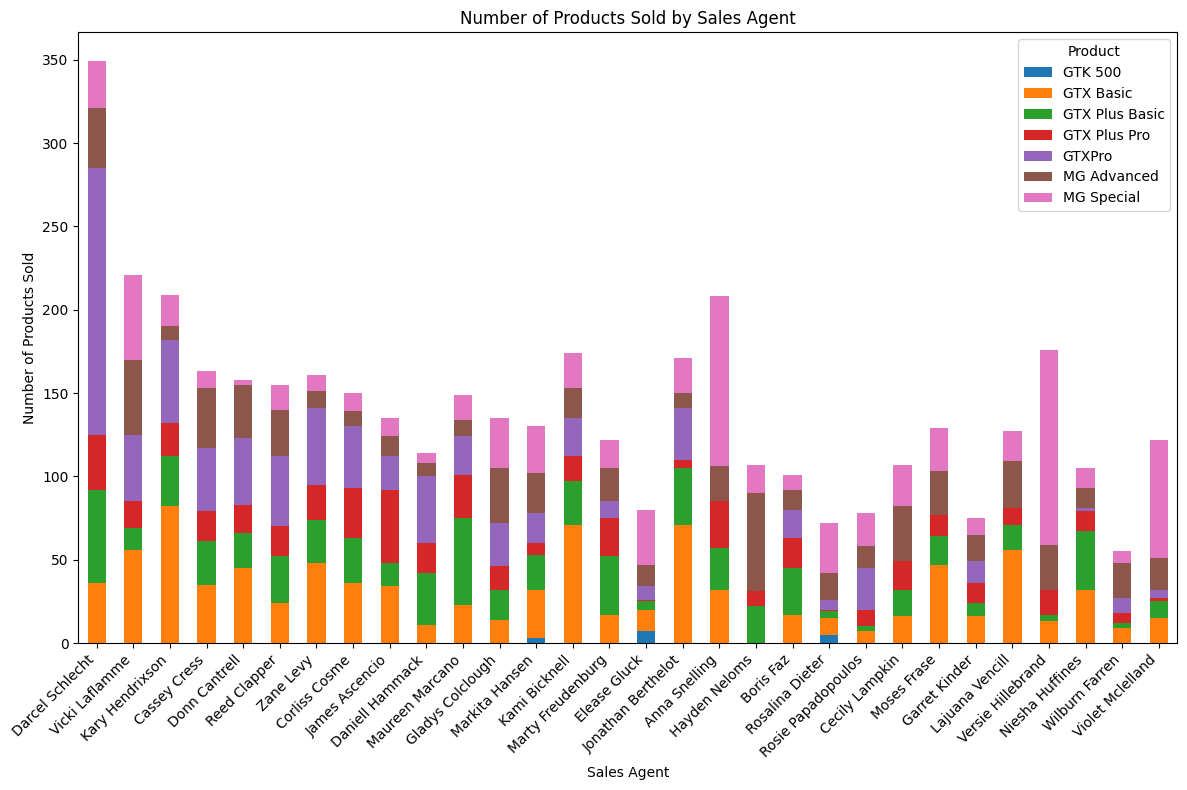

In [ ]:
import matplotlib.pyplot as plt
product_counts = sales_agent_merged2.set_index('sales_agent')[['GTK 500', 'GTX Basic', 'GTX Plus Basic', 'GTX Plus Pro', 'GTXPro', 'MG Advanced', 'MG Special']]

product_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number of Products Sold by Sales Agent')
plt.xlabel('Sales Agent')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product')
plt.tight_layout()
plt.show()


In [ ]:
product_table

sector,employment,entertainment,finance,marketing,medical,retail,services,software,technology,telecommunications,total,maximum_sector
product,,,,,,,,,,,,
GTK 500,2,4,2,1,2,2,0,1,0,1,15,entertainment
GTX Basic,45,57,68,86,120,186,47,96,150,60,915,retail
GTX Plus Basic,22,40,62,65,93,126,32,63,111,39,653,retail
GTX Plus Pro,16,27,42,47,71,92,29,50,68,37,479,retail
GTXPro,30,37,71,69,89,137,46,87,121,42,729,retail
MG Advanced,30,52,63,53,94,121,26,70,101,44,654,retail
MG Special,34,43,67,83,123,135,43,83,120,62,793,retail


In [ ]:
region_wise_product_distribution = pd.pivot_table(most_sold, index = "product",values = "close_value",columns = "regional_office", aggfunc = "count", fill_value = 0)

In [ ]:
region_wise_product_distribution["Total"] = region_wise_product_distribution["Central"] + region_wise_product_distribution["East"] + region_wise_product_distribution["West"]
region_wise_product_distribution["maximum region"] = region_wise_product_distribution[["Central", "East", "West"]].idxmax(axis=1)
region_wise_product_distribution

regional_office,Central,East,West,Total,maximum region
product,,,,,
GTK 500,0,0,15,15,West
GTX Basic,334,215,366,915,West
GTX Plus Basic,255,185,213,653,Central
GTX Plus Pro,170,149,160,479,Central
GTXPro,229,266,234,729,East
MG Advanced,245,194,215,654,Central
MG Special,396,162,235,793,Central


In [ ]:
account_wise_product_distribution = pd.pivot_table(most_sold, index = "product",values = "close_value", columns = "account", aggfunc = "count", fill_value = 0)
account_wise_product_distribution

account,Acme Corporation,Betasoloin,Betatech,Bioholding,Bioplex,Blackzim,Bluth Company,Bubba Gump,Cancity,Cheers,Codehow,Condax,Conecom,Dalttechnology,Domzoom,Doncon,Donquadtech,Dontechi,Donware,Fasehatice,Faxquote,Finhigh,Finjob,Funholding,Ganjaflex,Gekko & Co,Genco Pura Olive Oil Company,Globex Corporation,Gogozoom,Golddex,Goodsilron,Green-Plus,Groovestreet,Hatfan,Hottechi,Initech,Inity,Isdom,Iselectrics,J-Texon,Kan-code,Kinnamplus,Konex,Konmatfix,Labdrill,Lexiqvolax,Massive Dynamic,Mathtouch,Nam-zim,Newex,Ontomedia,Opentech,Plexzap,Plusstrip,Plussunin,Rangreen,Rantouch,Ron-tech,Rundofase,Scotfind,Scottech,Silis,Singletechno,Sonron,Stanredtax,Statholdings,Streethex,Sumace,Sunnamplex,The New York Inquirer,Toughzap,Treequote,Umbrella Corporation,Vehement Capital Partners,Warephase,Xx-holding,Xx-zobam,Y-corporation,Yearin,Zathunicon,Zencorporation,Zoomit,Zotware,Zumgoity,dambase
product,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GTK 500,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0
GTX Basic,4,7,12,12,5,8,5,6,12,15,15,22,13,11,11,4,6,17,7,8,13,10,17,11,15,11,17,10,10,10,19,10,8,7,37,7,17,10,2,16,26,9,24,7,10,11,7,7,9,10,5,3,12,5,9,17,5,15,19,14,9,7,16,14,12,3,14,6,10,3,9,11,8,4,11,10,10,20,8,8,9,9,7,6,10
GTX Plus Basic,7,5,6,6,4,4,6,7,5,12,15,16,9,4,8,2,11,7,6,11,6,6,5,13,5,14,6,8,4,9,9,4,5,8,20,8,14,10,6,6,15,5,19,9,5,8,5,6,3,3,2,5,6,5,10,13,12,15,7,7,10,5,16,4,10,8,9,3,4,3,4,5,5,4,14,10,4,7,6,11,3,6,8,10,7
GTX Plus Pro,7,4,7,7,4,5,1,2,5,5,7,13,6,4,6,5,5,4,2,6,7,7,1,6,8,5,6,7,3,3,12,7,4,9,6,6,7,9,6,5,17,4,13,3,4,10,2,7,2,2,8,5,6,7,8,5,2,3,3,9,3,4,5,8,7,3,10,2,3,3,5,11,7,3,9,4,5,4,3,5,4,2,7,3,10
GTXPro,7,9,6,5,5,5,6,11,12,6,8,15,11,7,4,7,16,10,3,13,6,6,8,10,9,11,8,7,8,2,9,8,5,10,15,6,12,10,4,6,26,8,18,4,8,4,9,19,7,9,9,6,7,5,11,8,3,9,12,13,7,6,14,7,8,4,7,7,10,7,6,12,15,14,12,10,10,9,7,1,10,3,12,5,5
MG Advanced,5,7,8,4,4,8,4,4,6,11,11,9,6,3,10,4,8,13,6,5,10,12,13,7,7,9,9,9,6,3,7,4,5,2,14,5,6,15,3,10,20,7,22,6,13,2,8,8,2,6,5,4,11,5,12,18,6,12,6,10,4,7,13,5,14,6,4,3,10,6,5,12,9,5,12,9,14,6,4,3,2,4,9,7,6
MG Special,4,2,14,16,9,11,6,6,15,5,16,30,9,14,14,11,9,19,6,6,6,13,12,12,2,10,8,9,20,6,8,8,7,7,19,5,12,11,4,7,10,7,12,13,5,3,7,5,9,7,5,7,4,6,5,14,9,16,18,14,15,6,8,8,18,10,19,2,8,6,10,14,4,4,12,3,3,7,8,6,5,8,4,5,16


In [ ]:
print(account_wise_product_distribution.index)
max_orders = []
for i in account_wise_product_distribution.index:
  maximum_order = account_wise_product_distribution.loc[i].max()
  for j in account_wise_product_distribution.columns:
    if account_wise_product_distribution.loc[i,j] == maximum_order:
      max_orders.append(j)
      break
account_wise_product_distribution["Maximum Order company"] = max_orders


Index(['GTK 500', 'GTX Basic', 'GTX Plus Basic', 'GTX Plus Pro', 'GTXPro',
       'MG Advanced', 'MG Special'],
      dtype='object', name='product')


In [ ]:
account_wise_product_distribution[["Maximum Order company"]]

account,Maximum Order company
product,
GTK 500,Cheers
GTX Basic,Hottechi
GTX Plus Basic,Hottechi
GTX Plus Pro,Kan-code
GTXPro,Kan-code
MG Advanced,Konex
MG Special,Condax


In [ ]:
overall_table = pd.merge(product_table, region_wise_product_distribution, on = "product", how = "outer")
overall_table = pd.merge(overall_table, account_wise_product_distribution[["Maximum Order company"]], on = "product", how = "outer")


In [ ]:
overall_table.sort_values(by = "total", ascending = False)

,employment,entertainment,finance,marketing,medical,retail,services,software,technology,telecommunications,total,maximum_sector,Central,East,West,Total,maximum region,Maximum Order company
product,,,,,,,,,,,,,,,,,,
GTX Basic,45,57,68,86,120,186,47,96,150,60,915,retail,334,215,366,915,West,Hottechi
MG Special,34,43,67,83,123,135,43,83,120,62,793,retail,396,162,235,793,Central,Condax
GTXPro,30,37,71,69,89,137,46,87,121,42,729,retail,229,266,234,729,East,Kan-code
MG Advanced,30,52,63,53,94,121,26,70,101,44,654,retail,245,194,215,654,Central,Konex
GTX Plus Basic,22,40,62,65,93,126,32,63,111,39,653,retail,255,185,213,653,Central,Hottechi
GTX Plus Pro,16,27,42,47,71,92,29,50,68,37,479,retail,170,149,160,479,Central,Kan-code
GTK 500,2,4,2,1,2,2,0,1,0,1,15,entertainment,0,0,15,15,West,Cheers


================================================================================================================


To find reasons of this high sales and best performing region and manager performance and their overall performance affecting sales agents

In [ ]:
sales_teams

,sales_agent,manager,regional_office
0,Anna Snelling,Dustin Brinkmann,Central
1,Cecily Lampkin,Dustin Brinkmann,Central
2,Versie Hillebrand,Dustin Brinkmann,Central
3,Lajuana Vencill,Dustin Brinkmann,Central
4,Moses Frase,Dustin Brinkmann,Central
5,Jonathan Berthelot,Melvin Marxen,Central
6,Marty Freudenburg,Melvin Marxen,Central
7,Gladys Colclough,Melvin Marxen,Central
8,Niesha Huffines,Melvin Marxen,Central
9,Darcel Schlecht,Melvin Marxen,Central


Below are the agents not available in sales pipeline data , and may not have made sales


In [ ]:
merged_df = pd.merge(sales_teams, sales_agent_merged2, on="sales_agent", how="outer", indicator=True)
not_in_merged2 = merged_df[merged_df["_merge"] == "left_only"]
sales_agents_not_in_merged2 = not_in_merged2["sales_agent"]
sales_agents_not_in_merged2.tolist()

['Mei-Mei Johns',
 'Elizabeth Anderson',
 'Natalya Ivanova',
 'Carol Thompson',
 'Carl Lin']

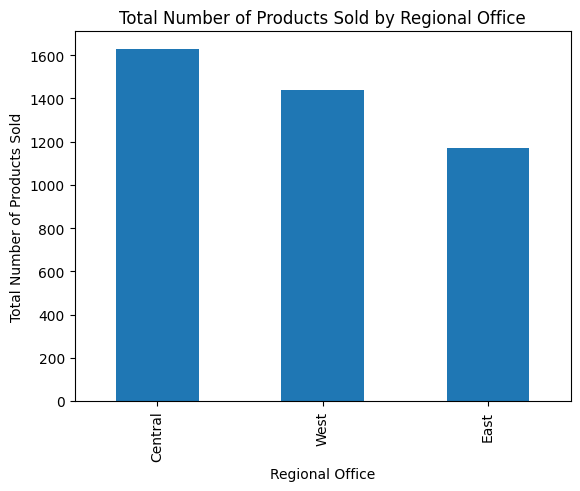

regional_office
Central    1629.0
East       1171.0
West       1438.0
Name: Number of products sold, dtype: float64

In [ ]:
sales_agent_merged2 = pd.merge(sales_agent_merged2, sales_teams, on="sales_agent", how="outer")

k = sales_agent_merged2.groupby("regional_office")["Number of products sold"].sum().sort_values(ascending=False)
k.plot(kind='bar')
plt.xlabel('Regional Office')
plt.ylabel('Total Number of Products Sold')
plt.title('Total Number of Products Sold by Regional Office')
plt.show()
sales_agent_merged2.groupby("regional_office")["Number of products sold"].sum()

In [ ]:
sales_agent_merged2 = sales_agent_merged2[0:30]
sales_agent_merged2 = sales_agent_merged2.drop(columns = ["lost_deals_percentage", "average_cost_sold"])
sales_agent_merged2

,sales_agent,close_value,Number of products sold,GTK 500,GTX Basic,GTX Plus Basic,GTX Plus Pro,GTXPro,MG Advanced,MG Special,Lost Deals,unique_companies,manager,regional_office
0,Darcel Schlecht,1153214.0,349.0,0.0,36.0,56.0,33.0,160.0,36.0,28.0,204.0,55.0,Melvin Marxen,Central
1,Vicki Laflamme,478396.0,221.0,0.0,56.0,13.0,16.0,40.0,45.0,51.0,126.0,46.0,Celia Rouche,West
2,Kary Hendrixson,454298.0,209.0,0.0,82.0,30.0,20.0,50.0,8.0,19.0,126.0,48.0,Summer Sewald,West
3,Cassey Cress,450489.0,163.0,0.0,35.0,26.0,18.0,38.0,36.0,10.0,98.0,45.0,Rocco Neubert,East
4,Donn Cantrell,445860.0,158.0,0.0,45.0,21.0,17.0,40.0,32.0,3.0,117.0,30.0,Rocco Neubert,East
5,Reed Clapper,438336.0,155.0,0.0,24.0,28.0,18.0,42.0,28.0,15.0,82.0,29.0,Rocco Neubert,East
6,Zane Levy,430068.0,161.0,0.0,48.0,26.0,21.0,46.0,10.0,10.0,100.0,48.0,Summer Sewald,West
7,Corliss Cosme,421036.0,150.0,0.0,36.0,27.0,30.0,37.0,9.0,11.0,79.0,48.0,Cara Losch,East
8,James Ascencio,413533.0,135.0,0.0,34.0,14.0,44.0,20.0,12.0,11.0,71.0,42.0,Summer Sewald,West
9,Daniell Hammack,364229.0,114.0,0.0,11.0,31.0,18.0,40.0,8.0,6.0,73.0,44.0,Rocco Neubert,East


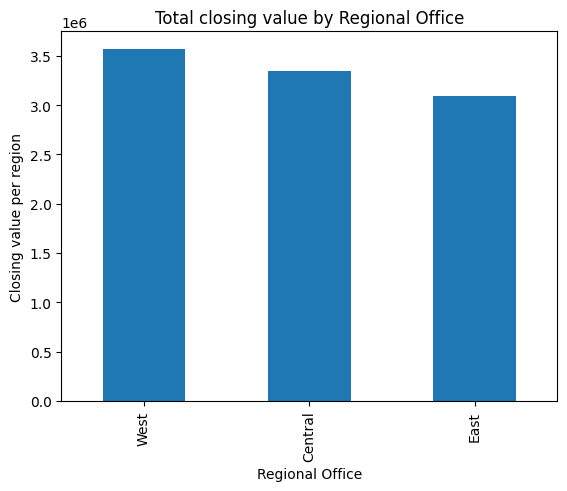

<Axes: ylabel='close_value'>

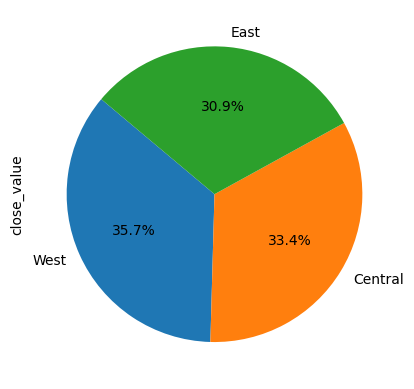

In [ ]:
k = sales_agent_merged2.groupby("regional_office")["close_value"].sum().sort_values(ascending=False)
k.plot(kind='bar')
plt.xlabel('Regional Office')
plt.ylabel('Closing value per region')
plt.title('Total closing value by Regional Office')
plt.show()
k.plot(kind='pie', autopct='%1.1f%%', startangle=140)


In [ ]:
k

regional_office
West       3568647.0
Central    3346293.0
East       3090594.0
Name: close_value, dtype: float64

As seenabove, Central was able to sell more products but West overall had a better closing value, lets have a check at regionwise Sales agents' performance

,GTK 500,GTX Basic,GTX Plus Basic,GTX Plus Pro,GTXPro,MG Advanced,MG Special
regional_office,,,,,,,
Central,0.0,334.0,255.0,170.0,229.0,245.0,396.0
East,0.0,215.0,185.0,149.0,266.0,194.0,162.0
West,15.0,366.0,213.0,160.0,234.0,215.0,235.0


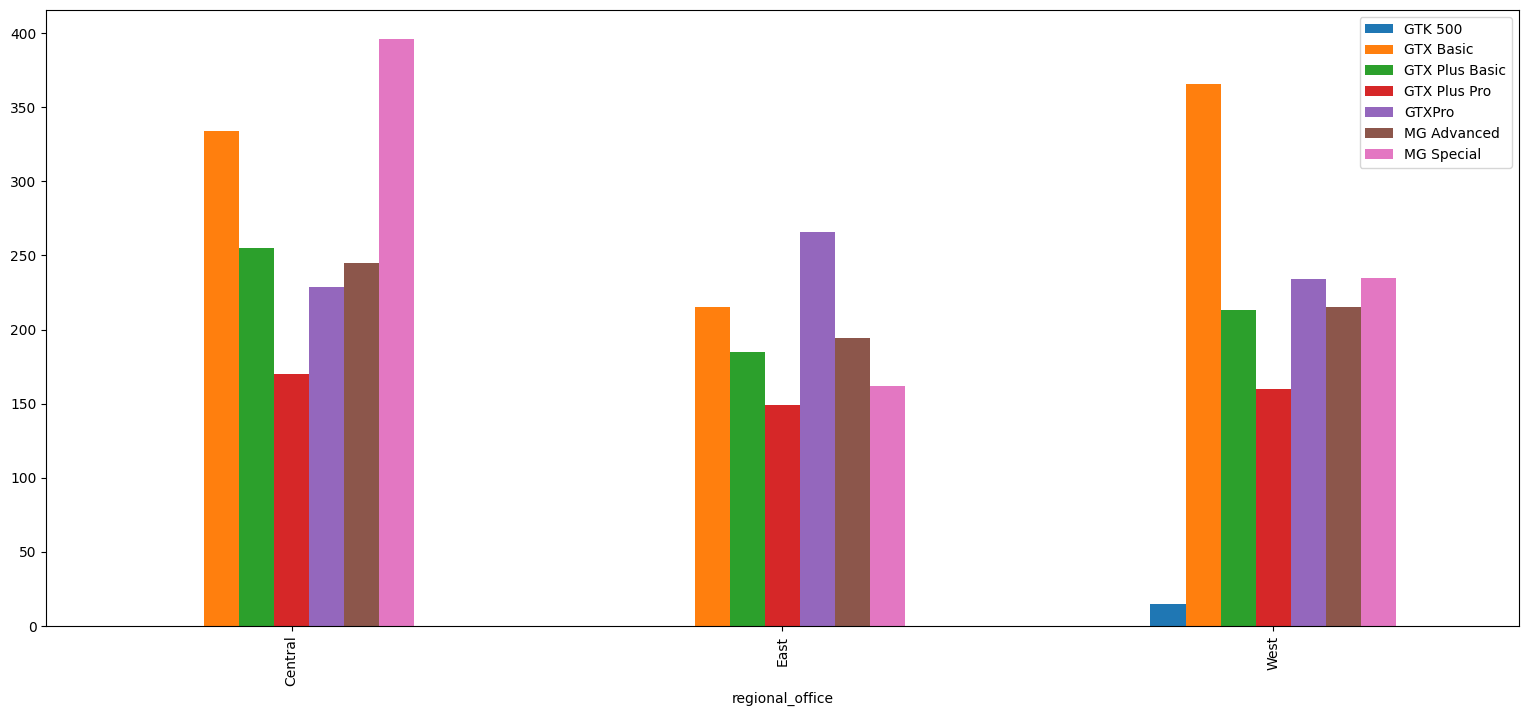

In [ ]:
regionwise_performance = sales_agent_merged2.groupby("regional_office").apply(lambda x: x.sort_values(by="close_value", ascending=False))
regionwise_performance = regionwise_performance.reset_index(drop=True)

regionwise_product_sale = regionwise_performance.groupby("regional_office")[["GTK 500", "GTX Basic", "GTX Plus Basic", "GTX Plus Pro", "GTXPro", "MG Advanced", "MG Special"]].sum()
regionwise_product_sale.plot(kind='bar', stacked=False, figsize=(19, 8))
regionwise_product_sale

According to the graph,

GTK500 had most sales in the western office

GTX Pro, GTX Plus Pro had relatively same sales across the place

GTX Basic had most sales in  Western office and least in east office

MG advanced had most sales in Central

GTX Plus Basic had most sales in Central






10005534.0

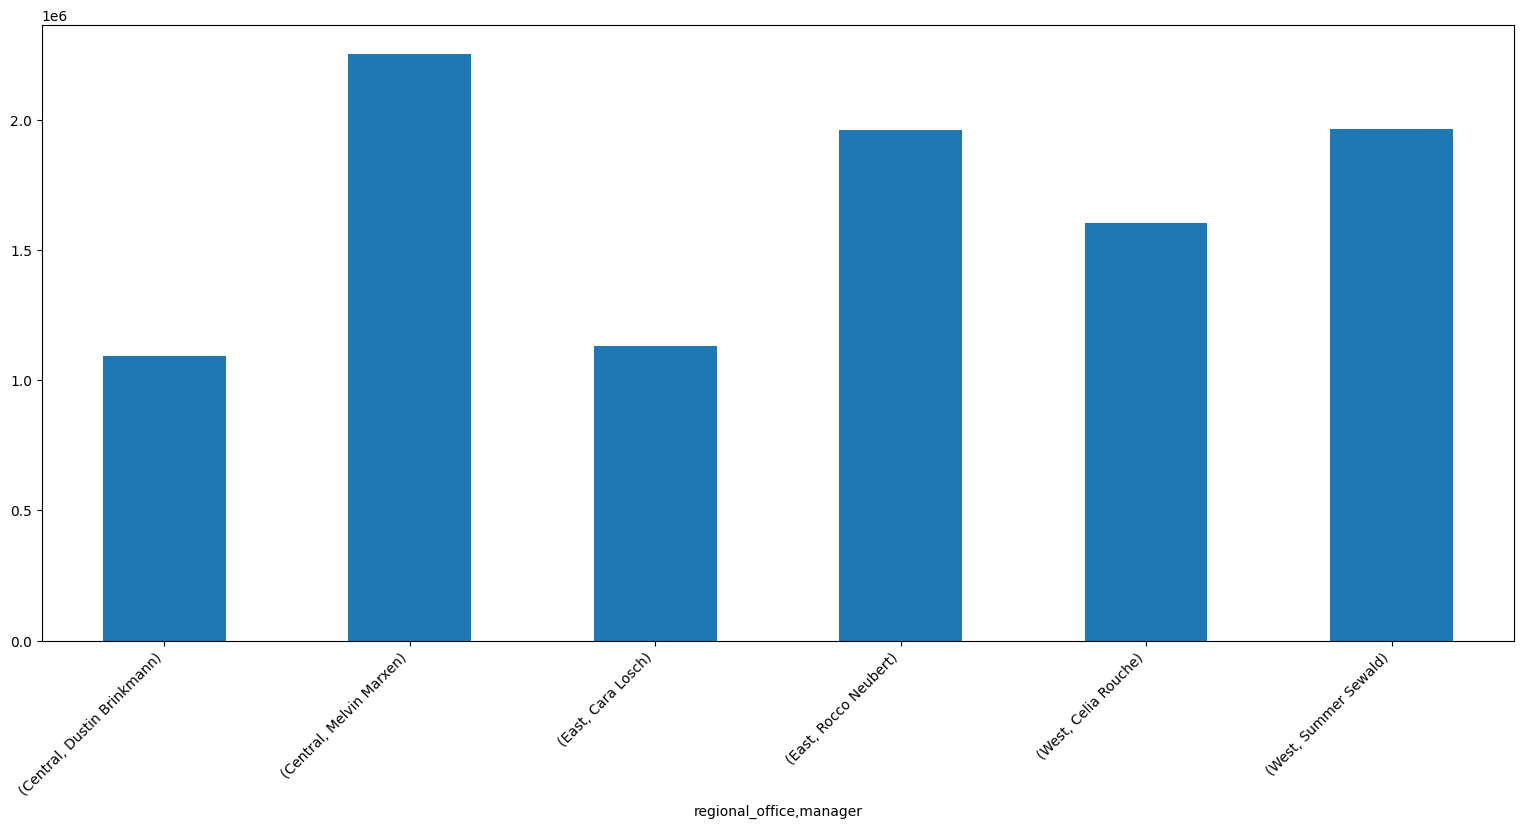

In [ ]:
regionwise_performance = sales_agent_merged2.groupby(["regional_office", "manager"]).apply(lambda x: x.sort_values(by="close_value", ascending=True)).reset_index(drop=True)
performance_plot = regionwise_performance.groupby(["regional_office", "manager"])["close_value"].sum()
performance_plot.plot(kind='bar', stacked=False, figsize=(19, 8))
plt.xticks(rotation=45, ha='right')
performance_plot.sum()

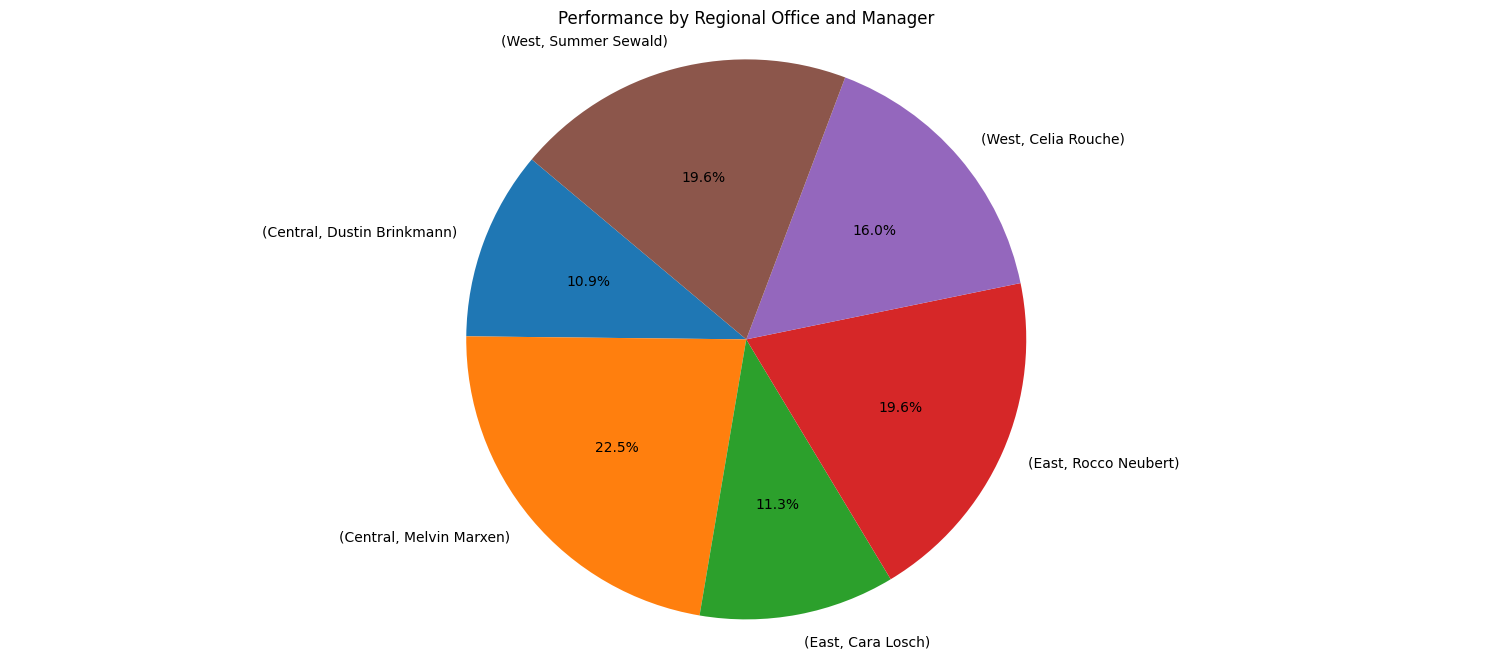

In [ ]:
performance_plot = regionwise_performance.groupby(["regional_office", "manager"])["close_value"].sum()
plt.figure(figsize=(19, 8))
performance_plot.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title('Performance by Regional Office and Manager')
plt.axis('equal')
plt.show()


Now to analyse manager wise Sales agent performance

In [ ]:
#regionwise_performance.drop(columns = ["average_cost_sold", "lost_deals_percentage"], inplace = True)
regionwise_performance[regionwise_performance["manager"] == "Dustin Brinkmann"]

,sales_agent,close_value,Number of products sold,GTK 500,GTX Basic,GTX Plus Basic,GTX Plus Pro,GTXPro,MG Advanced,MG Special,Lost Deals,unique_companies,manager,regional_office
0,Versie Hillebrand,187693.0,176.0,0.0,13.0,4.0,15.0,0.0,27.0,117.0,88.0,47.0,Dustin Brinkmann,Central
1,Lajuana Vencill,194632.0,127.0,0.0,56.0,15.0,10.0,0.0,28.0,18.0,104.0,41.0,Dustin Brinkmann,Central
2,Moses Frase,207182.0,129.0,0.0,47.0,17.0,13.0,0.0,26.0,26.0,66.0,41.0,Dustin Brinkmann,Central
3,Cecily Lampkin,229800.0,107.0,0.0,16.0,16.0,17.0,0.0,33.0,25.0,53.0,34.0,Dustin Brinkmann,Central
4,Anna Snelling,275056.0,208.0,0.0,32.0,25.0,28.0,0.0,21.0,102.0,128.0,53.0,Dustin Brinkmann,Central


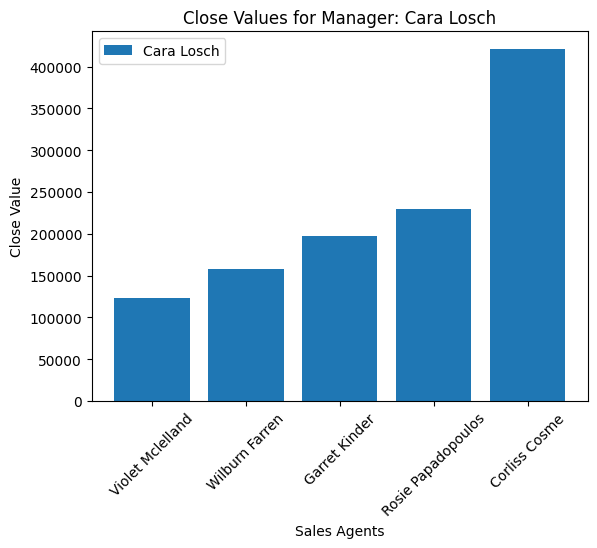

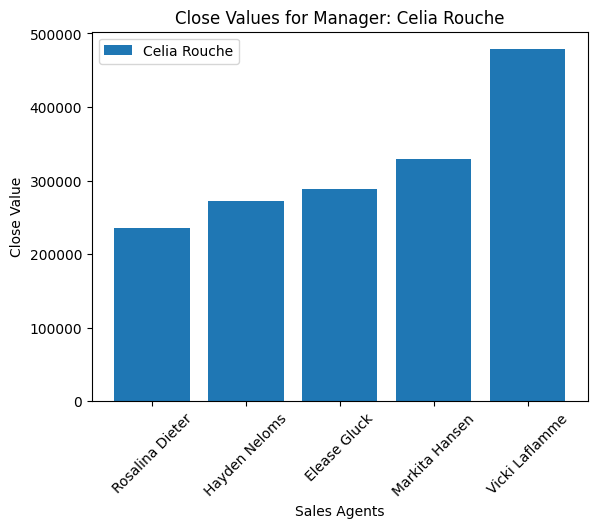

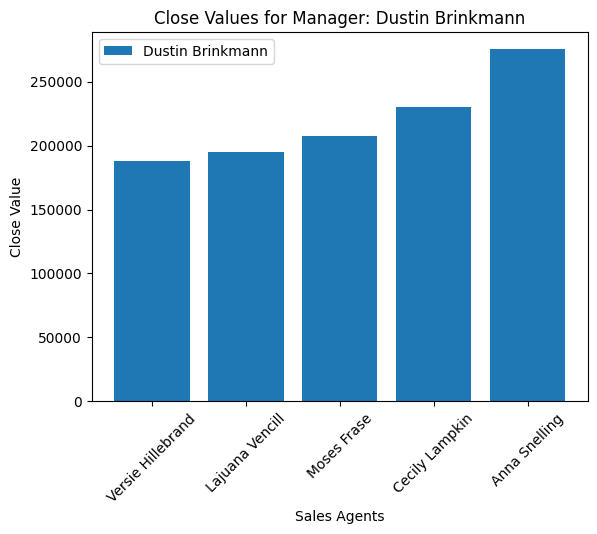

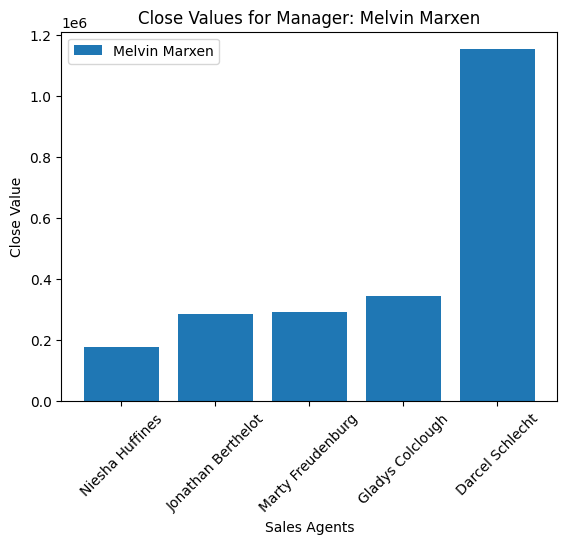

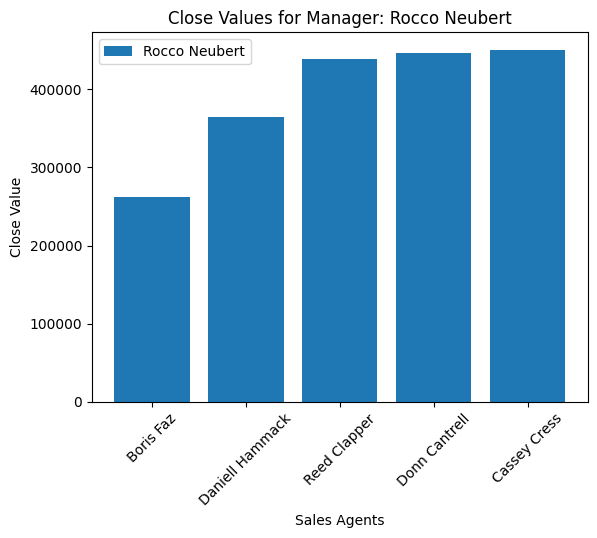

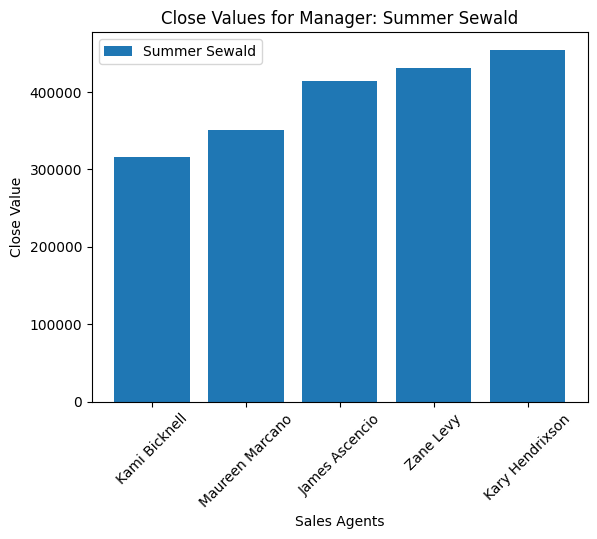

In [ ]:
import matplotlib.pyplot as plt

# Group by manager and sort by close_value within each group
grouped_by_manager = regionwise_performance.groupby("manager").apply(lambda x: x.sort_values(by="close_value"))
manager_agent_plot = {}

# Select relevant columns
grouped_by_manager = grouped_by_manager[["close_value", "sales_agent"]]

# Plot for each manager
for manager, group in grouped_by_manager.groupby(level=0):
    close_values = group["close_value"].tolist()
    sales_agents = group["sales_agent"].tolist()

    # Store sales agents for the manager in the dictionary
    manager_agent_plot[manager] = sales_agents

    # Plot the bar chart
    plt.figure()  # Create a new figure for each manager
    plt.bar(sales_agents, close_values, label=manager)
    plt.xlabel("Sales Agents")
    plt.ylabel("Close Value")
    plt.title(f"Close Values for Manager: {manager}")
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.legend()
    plt.show()




In [ ]:
def region_wise_performance_plot(region : str, kind : str):
  west = regionwise_performance[regionwise_performance["regional_office"] == region]
  west.groupby("manager")[["GTK 500", "GTX Basic", "GTX Plus Pro", "GTXPro","MG Advanced","MG Special"]].sum().plot(kind=kind, stacked=False, figsize=(19, 8))
  plt.xticks(rotation=0, ha='right')
  plt.xlabel(region)
  plt.ylabel("Number of units sold")

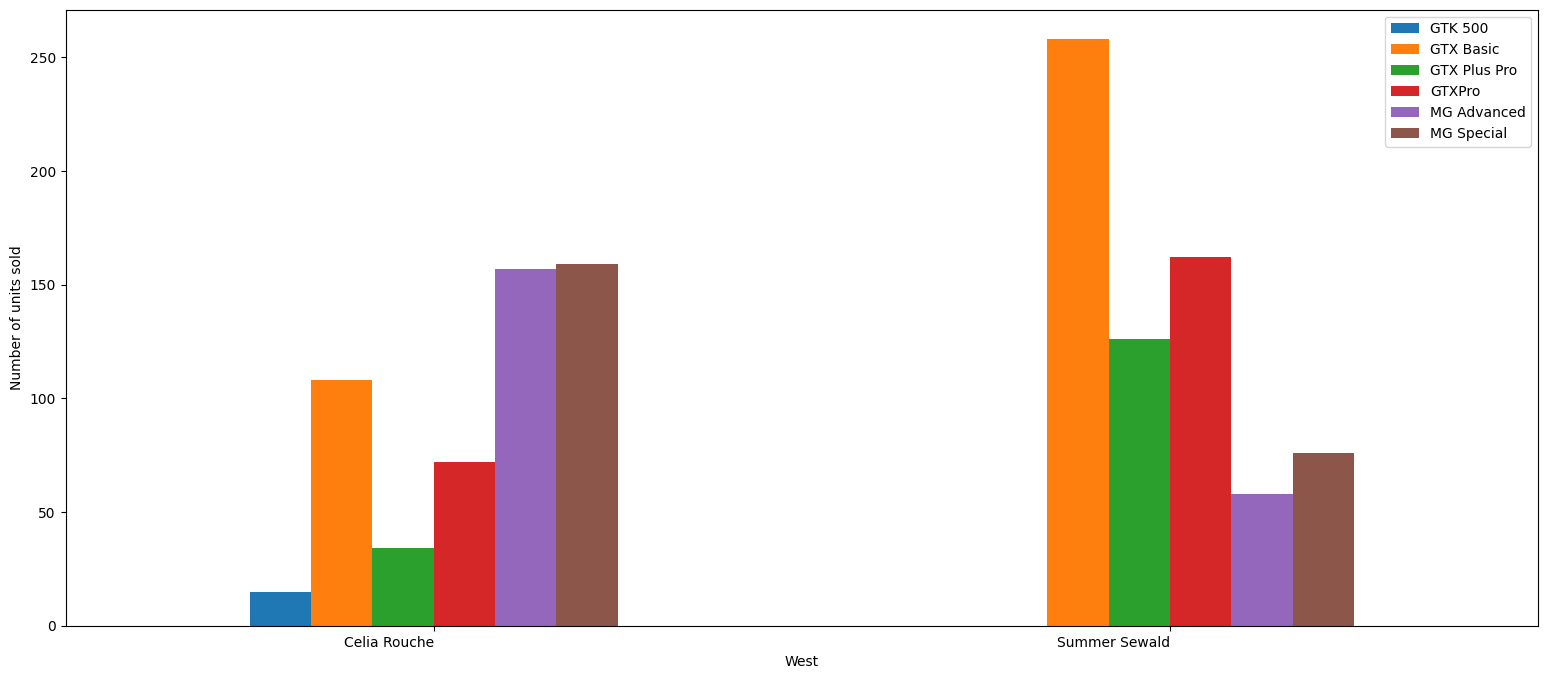

In [ ]:
region_wise_performance_plot("West", "bar")

Empty DataFrame
Columns: [sales_agent, close_value, Number of products sold, GTK 500, GTX Basic, GTX Plus Basic, GTX Plus Pro, GTXPro, MG Advanced, MG Special, Lost Deals, unique_companies, manager, regional_office]
Index: []


manager
Dustin Brinkmann    747.0
Melvin Marxen       882.0
dtype: float64

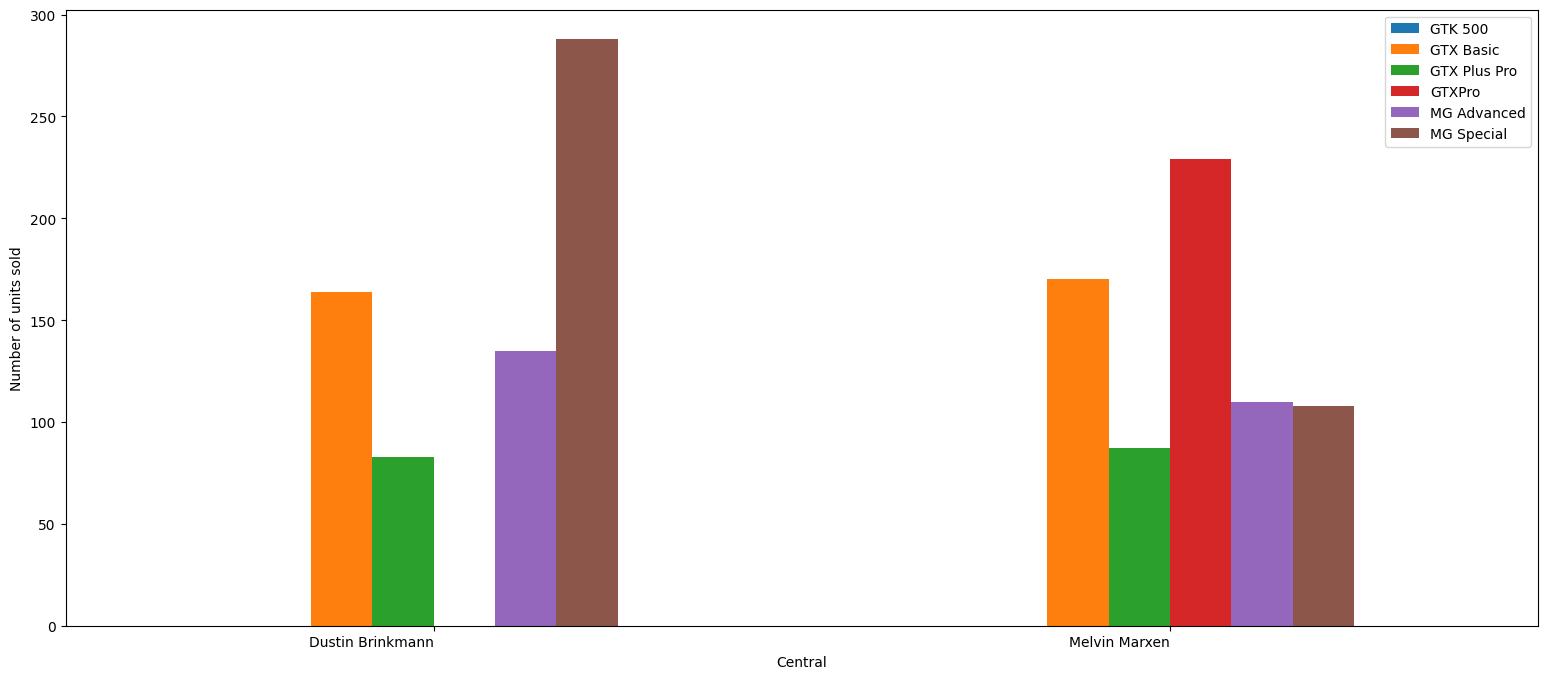

In [ ]:
region_wise_performance_plot("Central", "bar")
print(regionwise_performance[(regionwise_performance["regional_office"] == "Central") &regionwise_performance["sales_agent"] == "Darcel Schlect" ])#.groupby("manager").apply(lambda x : x["Number of products sold"].sum())
regionwise_performance[regionwise_performance["regional_office"] == "Central"].groupby("manager").apply(lambda x : x["Number of products sold"].sum())

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



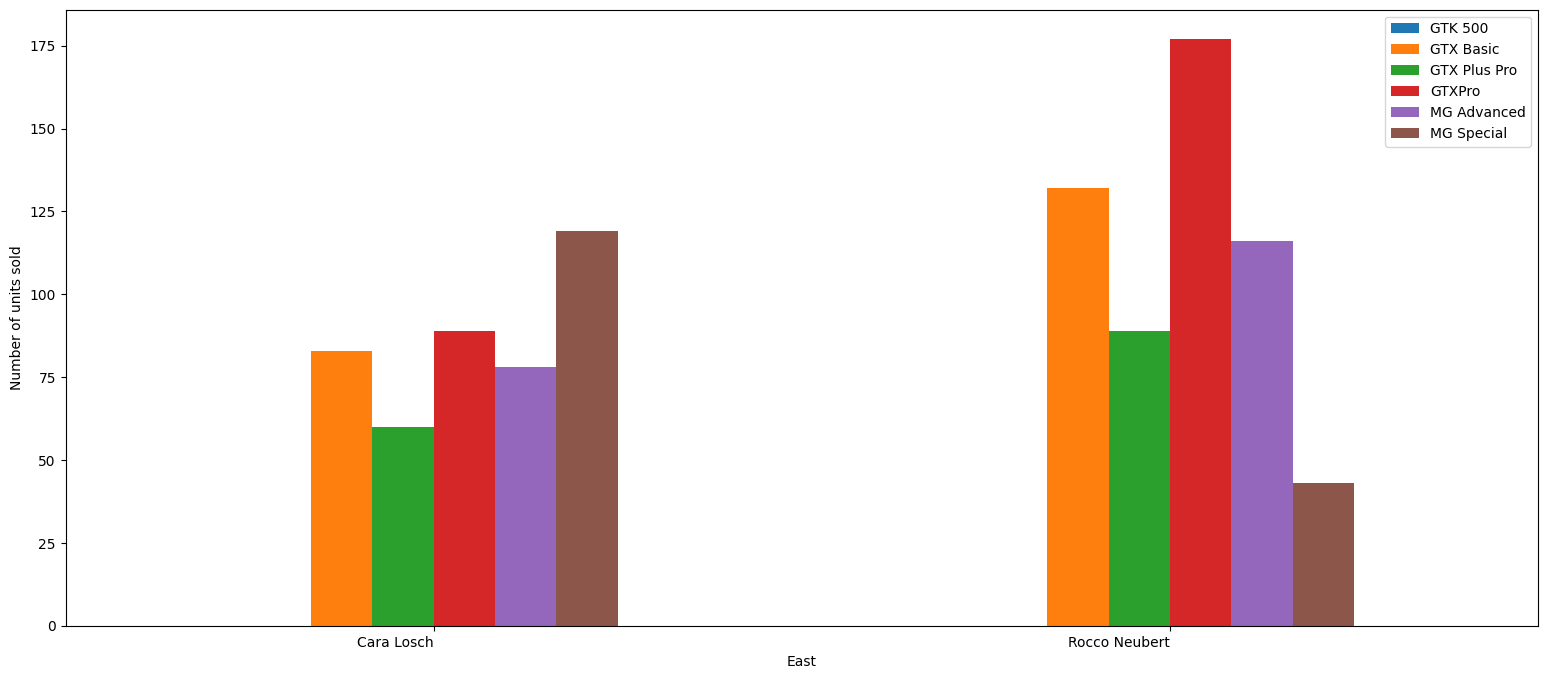

In [ ]:
region_wise_performance_plot("East", "bar")


Sales Agent on bias


In [ ]:
import random
import pandas as pd

countries = ["USA", "South Africa", "Canada", "India", "Germany", "France", "United Kingdom", "Australia", "Japan", "China", "Russia", "Italy", "Spain"]
year_of_join = []
for i in range(20):
  year_of_join.append(random.randint(1990, 2016))
sales_agent_merged2["country"] = random.choices(countries, k=len(sales_agent_merged2))
sales_agent_merged2["year of join"] = random.choices(year_of_join, k=len(sales_agent_merged2))
sales_agent_merged2

,sales_agent,close_value,Number of products sold,GTK 500,GTX Basic,GTX Plus Basic,GTX Plus Pro,GTXPro,MG Advanced,MG Special,Lost Deals,unique_companies,manager,regional_office,country,year of join,time (in years)
17,Anna Snelling,275056.0,208.0,0.0,32.0,25.0,28.0,0.0,21.0,102.0,128.0,53.0,Dustin Brinkmann,Central,Germany,2000,27
24,Garret Kinder,197773.0,75.0,0.0,16.0,8.0,12.0,13.0,16.0,10.0,48.0,30.0,Cara Losch,East,Japan,2000,22
3,Cassey Cress,450489.0,163.0,0.0,35.0,26.0,18.0,38.0,36.0,10.0,98.0,45.0,Rocco Neubert,East,Germany,1997,21
21,Rosie Papadopoulos,230169.0,78.0,0.0,7.0,3.0,10.0,25.0,13.0,20.0,43.0,38.0,Cara Losch,East,China,1990,21
20,Rosalina Dieter,235403.0,72.0,5.0,10.0,4.0,1.0,6.0,16.0,30.0,38.0,41.0,Celia Rouche,West,Australia,1993,18
4,Donn Cantrell,445860.0,158.0,0.0,45.0,21.0,17.0,40.0,32.0,3.0,117.0,30.0,Rocco Neubert,East,Russia,1999,16
8,James Ascencio,413533.0,135.0,0.0,34.0,14.0,44.0,20.0,12.0,11.0,71.0,42.0,Summer Sewald,West,Japan,1990,16
11,Gladys Colclough,345674.0,135.0,0.0,14.0,18.0,14.0,26.0,33.0,30.0,97.0,45.0,Melvin Marxen,Central,Italy,1993,14
19,Boris Faz,261631.0,101.0,0.0,17.0,28.0,18.0,17.0,12.0,9.0,52.0,39.0,Rocco Neubert,East,Germany,2014,14
15,Elease Gluck,289195.0,80.0,7.0,13.0,5.0,1.0,8.0,13.0,33.0,46.0,40.0,Celia Rouche,West,China,2000,13


In [ ]:
sales_agent_merged2["time (in years)"] = 2017 - sales_agent_merged2["year of join"]
sales_agent_merged2 = sales_agent_merged2.sort_values(by = "time (in years)", ascending = False)
biased_result = sales_agent_merged2[(sales_agent_merged2["time (in years)"] == sales_agent_merged2["time (in years)"].max()) & (sales_agent_merged2['country'] == "India")]
biased_result

,sales_agent,close_value,Number of products sold,GTK 500,GTX Basic,GTX Plus Basic,GTX Plus Pro,GTXPro,MG Advanced,MG Special,Lost Deals,unique_companies,manager,regional_office,country,year of join,time (in years)
7,Corliss Cosme,421036.0,150.0,0.0,36.0,27.0,30.0,37.0,9.0,11.0,79.0,48.0,Cara Losch,East,India,1990,27
